## Import and directories

In [2]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
print('The working directory is parentdir: %s' %parentdir)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
download = r'/home/biswajit/Downloads'

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Manuscript/Figure_SI


In [3]:
#Run this once to run the .py(Analysis_bis.py) file.
os.chdir(r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis')
# !python Analysis_bis.py
%run Analysis_bis.py

In [4]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "10"

## Time traces

Time traces of $Zinc$ Azurin labeled with ATTO 655 at different potential.

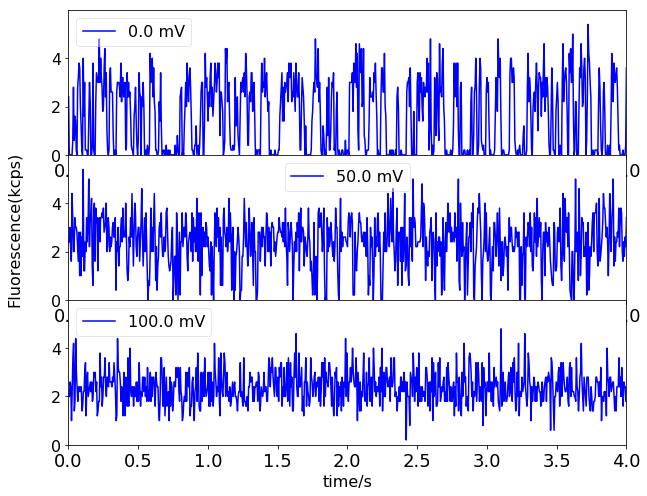

In [5]:
homedir_A4=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4'
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "18"
fig = time_trace_plot(foldername= homedir_A4, input_potential=[0, 50, 100], pointnumbers=[6], x_lim_min=0, y_lim_min=0, x_lim_max=4, y_lim_max=6, bin=5, show_changepoint=False)
os.chdir(parentdir)
savefig('SI_timetrace_Zn_part.pdf', dpi=300, transparent=True)

Time traces of $Copper$ Azurin labeled with ATTO 655 at different potential.

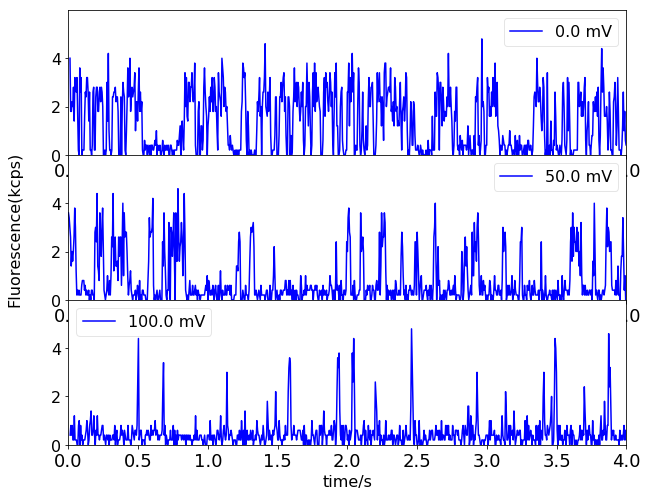

In [57]:
folder=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/30sec_trace'
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "18"

fig = time_trace_plot(foldername= folder, input_potential=[0, 50, 100], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=4, y_lim_max=6, bin=5, show_changepoint=False)
os.chdir(parentdir)
savefig('SI_timetrace_Cu_part.pdf', dpi=300, transparent=True)

## Midpoint_hist: ZnAzurin

In [43]:
def Mid_potentials_slopem(folderpath=foldername, pointnumbers=range(20), plotting=True, max_pot=40, min_pot_num=1):
    timetrace_output = timetrace_outputs_folderwise(folderpath=folderpath, pointnumbers=pointnumbers, potentialist=potentialist)
    def nernst(x, a):
        '''x is potential
        a: E0/midpoint potential(parameter)
        returns ratio(t_oxd/t_red)'''
        return(10**((a-x) / 0.059))
    nernst_mod = Model(nernst)
    params_nernst = nernst_mod.make_params(a=0.02)
    def nernst_slopem(x, a, m):
        return(10**((a-x) / m))
    nernst_slopem_mod = Model(nernst_slopem)
    params_ner_slop = nernst_slopem_mod.make_params(a=0.02, m=0.059)
    columns_E0 = ['Point number', 'E0_fit', 'E0_err']
    columns_E0_m = ['Point number', 'E0_fit', 'E0_err', 'slope', 'slope_error']
    E0_list = pd.DataFrame(index=None, columns=columns_E0)
    E0_m_list = pd.DataFrame(index=None, columns=columns_E0_m)
    #--figure initiation----
    if plotting == True:
        fig, axes = plt.subplots(1, 2, figsize=(10,4))
        cmap = plt.get_cmap('hsv')#jet_r
        N=len(timetrace_output.columns.levels[0])
    for i in range(len(timetrace_output.columns.levels[0])):
        point = timetrace_output.columns.levels[0][i]
        point_output_tot = timetrace_output[point].dropna()
        point_output = point_output_tot[point_output_tot['Potential'] <= max_pot] #select a potential threshold
        point_output.reset_index(drop=True, inplace=True)
        if len(point_output)>min_pot_num:
            potential = point_output['Potential']
            t_onav = point_output['t_onav']
            t_onaverr = point_output['t_onaverr']
            t_offav = point_output['t_offav']
            t_offaverr = point_output['t_offaverr']
            t_ratio = point_output['t_ratio']
            t_ratioerr = point_output['t_ratioerr']
            E = potential*0.001 #converting to mV
            #--------fitting nernst----------------
            res_nernst = nernst_mod.fit(t_ratio, params_nernst, x=E)
            out_params = str((res_nernst.params['a'],'value'));
            E0 = res_nernst.best_values['a']
            E0_err = float(out_params.split('+/- ')[1].split(', bounds')[0]);
            #---------append to list---------
            E0_list_temp = pd.DataFrame([[point, E0, E0_err]], columns=columns_E0)
            E0_list=E0_list.append(E0_list_temp, ignore_index=True)
            #--------fitting nernst_slopem------
            res_nernst_slop = nernst_slopem_mod.fit(t_ratio, params_ner_slop, x=E)
            E0_m = res_nernst_slop.best_values['a']
            out_params = str((res_nernst_slop.params['a'],'value'));
            E0_m_err = float(out_params.split('+/- ')[1].split(', bounds')[0]);
            slope_m = res_nernst_slop.best_values['m']
            out_params_m = str((res_nernst_slop.params['m'],'value'));
            slope_m_err = float(out_params_m.split('+/- ')[1].split(', bounds')[0]);
            E0_m_list_temp = pd.DataFrame([[point, E0_m, E0_m_err, slope_m, slope_m_err]], columns=columns_E0_m)
            E0_m_list = E0_m_list.append(E0_m_list_temp, ignore_index=True)
            #-----plot------
            if plotting == True:
                color = cmap(float(i)/N)
                axes[0].errorbar(point_output_tot['Potential'], point_output_tot['t_ratio'],
                         yerr=point_output_tot['t_ratioerr'], fmt='o', color=color, label=point, ms=5)#plot raw outputs
                axes[0].plot(linspace(min(potential)-10, max(potential)+10), nernst(0.001*linspace(min(potential)-10, max(potential)+10), E0), color=color, linewidth=2.0)#color
                #plot(E*1000, nernst(E, *E0_fit), color=color, linewidth=2.0)

                
                axes[1].errorbar(point_output_tot['Potential'], point_output_tot['t_ratio'],
                         yerr=point_output_tot['t_ratioerr'], fmt='o', color=color, label=point, ms=5)#plot raw outputs
                axes[1].plot(linspace(min(potential)-10, max(potential)+10), nernst_slopem(0.001*linspace(min(potential)-10, max(potential)+10), E0_m, slope_m), color=color, linewidth=2.0)
                
                axes[0].set_xlim(-125, 60)
                axes[1].set_xlim(-125, 60)
                axes[0].set_ylim(0.01, 100)
                axes[1].set_ylim(0.01, 100)
                axes[0].set_yscale('log')
                axes[0].set_xlabel('$Potential [V]$', fontsize=20)
                axes[0].set_ylabel('$T_{OFF}/T_{ON}$', fontsize=20)
                axes[0].tick_params(axis='both', which='major', labelsize=16)
                axes[0].set_title(r'$E=E_0 + 0.059log(\frac{t_{off}}{t_{on}})$')
                axes[1].set_yscale('log')
                axes[1].set_xlabel('$Potential [V]$', fontsize=20)
                axes[1].set_ylabel('$T_{OFF}/T_{ON}$', fontsize=20)
                axes[1].tick_params(axis='both', which='major', labelsize=16)
                axes[1].set_title(r'$E=E_0 + m.log(\frac{t_{off}}{t_{on}})$')
                tight_layout()
    return(E0_list, E0_m_list)

### potential vs ratio

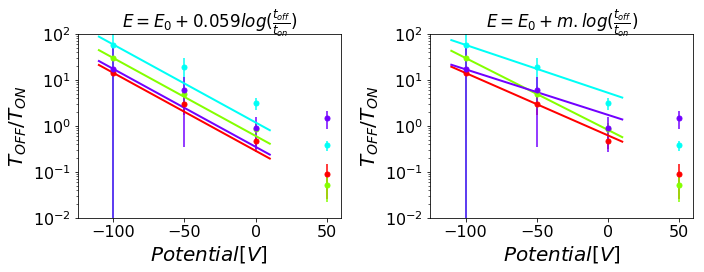

In [50]:
folder=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4'
E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=[1, 10, 11, 12], plotting=True, max_pot=25, min_pot_num=1)
# legend()
os.chdir(parentdir)
savefig('SI_potential_vs_ratio_ZnAzurin.pdf', dpi=300, transparent=True)

### potential histogram

In [7]:
S82d9Sept16_ZnAzu655_A3_30s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A3/30sec_trace';
S82d9Sept16_ZnAzu655_A3_200s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A3/200sec_trace';
S82d9Sept16_ZnAzu655_A4 = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4';
# S107d1May17_ZnAzu655_SM_A1 = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_SM/S107d1May17_635_ZnAzu655_SM_A1';
# S107d1May17_ZnAzu655_SM_A2_30s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_SM/S107d1May17_635_ZnAzu655_SM_A2_30s';
allfolders = [S82d9Sept16_ZnAzu655_A3_30s, S82d9Sept16_ZnAzu655_A3_200s, S82d9Sept16_ZnAzu655_A4];
E0_array = pd.DataFrame(index=None, columns=['Point number', 'E0_fit', 'E0_err'])
E0_m_array = pd.DataFrame(index=None, columns=['Point number', 'E0_fit', 'E0_err', 'slope', 'slope_error'])
for folder in allfolders:
    E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=range(50), plotting=False, max_pot=25)
    E0_array = E0_array.append(E0_list, ignore_index=True)
    E0_m_array = E0_m_array.append(E0_m_list, ignore_index=True)

em.plot file of Point_6 with potential 100.0 doesnt exist


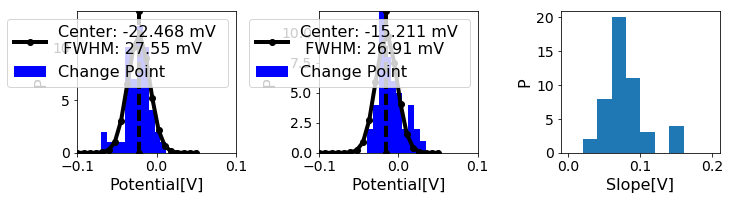

In [52]:
#MIDPOTENTIAL HISTGRAM FITTING
def plot_midpoint_hist(E0_array, E0_m_array):
    fig = plt.figure(figsize=(10, 3))
    # plt.figure()
    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.size"] = "14"
    min_range = -0.1
    max_range = 0.05
    range_fit = [min_range, max_range]
    bins = 20
    bin_centers_on = linspace(range_fit[0], range_fit[1], bins)
    x=linspace(range_fit[0], range_fit[1], 100)# for a smooth fitting plot include more points

    from scipy.interpolate import interp1d
    from lmfit.models import GaussianModel
    mod = GaussianModel()
    # params = gmodel.make_params(center=0.01, amplitude=10, sigma=0.02)
    #Change point--------------------------
    ax1 = fig.add_subplot(1,3,1)#2,2,1
    n,bins_on1,patches = ax1.hist(E0_array['E0_fit'], bins = bins, range=range_fit, color='b', label='Change Point')#E0_list from running all folder
    y=n; x=bin_centers_on;
    result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
    temp =result1.best_values
    FWHM = 2*temp['sigma']*1000 #V
    cent = temp['center']*1000#eV
    amp = temp['amplitude']

    ax1.plot(x, result1.best_fit, '-ko', lw=4, label='Center: %.3f mV \n FWHM: %.2f mV' %(cent, FWHM))
    amp = temp['amplitude']
    height = 0.3989423*amp/max(1.e-15, temp['sigma'])
    ax1.plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

    ax1.set_xlim(-0.1, 0.1)
    ax1.set_ylim(0,height+0.2*height)
    ax1.set_ylabel('P', fontsize=16)
    ax1.set_xlabel('Potential[V]', fontsize=16)
    ax1.legend(fontsize=16)
    #-----
    ax2 = fig.add_subplot(1,3,2)
    n,bins_on1,patches = ax2.hist(E0_m_array['E0_fit'], bins = bins, range=range_fit, color='b', label='Change Point')#E0_list from running all folder

    y=n; x=bin_centers_on;
    result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
    temp =result1.best_values
    FWHM = 2*temp['sigma']*1000 #V
    cent = temp['center']*1000#eV
    amp = temp['amplitude']

    ax2.plot(x, result1.best_fit, '-ko', lw=4, label='Center: %.3f mV \n FWHM: %.2f mV' %(cent, FWHM))
    amp = temp['amplitude']
    height = 0.3989423*amp/max(1.e-15, temp['sigma'])
    ax2.plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

    ax2.set_xlim(-0.1, 0.1)
    ax2.set_ylim(0,height+0.2*height)
    ax2.set_ylabel('P', fontsize=16)
    ax2.set_xlabel('Potential[V]', fontsize=16)
    ax2.legend(fontsize=16)
    #-----
    ax3 = fig.add_subplot(1,3,3)
    n,bins_on1,patches = ax3.hist(E0_m_array['slope'], bins = 10, range=(0, 0.2))#, range=range_fit, color='b', label='Change Point'
    # ax3.plot(E0_m_array['E0_fit']*1000, E0_m_array['slope'], )
    # ax3.set_xlim(-0.1, 0.1)
    # ax3.set_ylim(0,height+0.2*height)
    ax3.set_ylabel('P', fontsize=16)
    ax3.set_xlabel('Slope[V]', fontsize=16)
    # ax3.legend(fontsize=16)

    fig.tight_layout()
    # os.chdir(homedir)
    # fig.savefig('/home/biswajit/Pictures/canters_temp/MidpointPotential_distribution.pdf', dpi=300, transparent=True)
    # figure()
    # result.plot()
    return()
plot_midpoint_hist(E0_array, E0_m_array)
os.chdir(parentdir)
savefig('SI_potential_histogram_Zn.pdf', dpi=300, transparent=True)

## Ton_Toff histogram: 1D

In [ ]:
dira = [r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc']
t_ons, t_offs = histogram_on_off_all_folder(allfolders= dira, input_potential=[0], pointnumbers=range(100), 
                                        bins_on=200, range_on=[0, 0.1], bins_off=200, range_off=[0, 0.2], plotting=True)

## Ton_Toff histogram: 2D

Number of on events: 7492
Number of off events: 7482


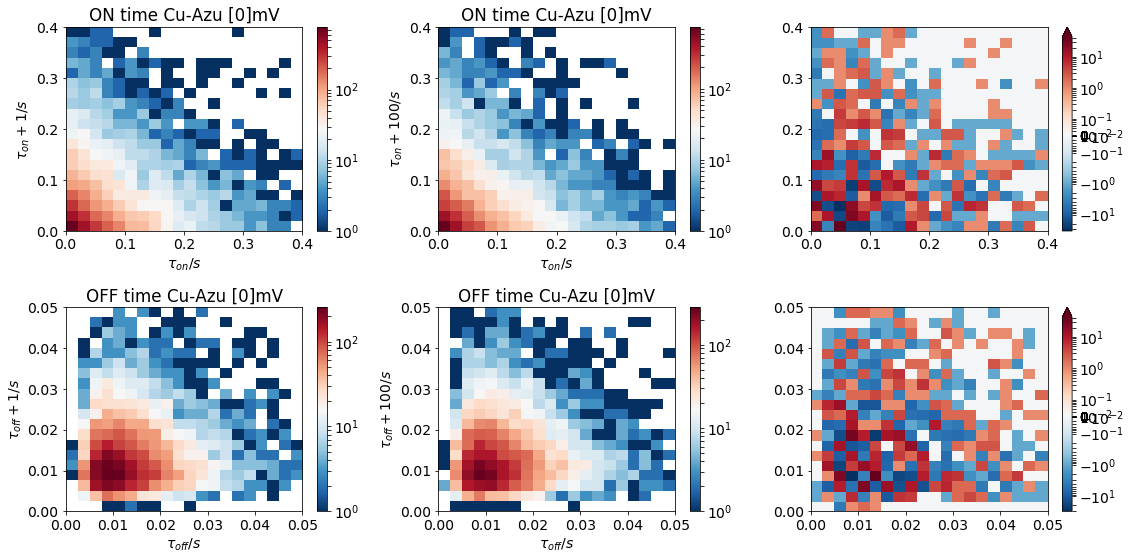

In [29]:
folder_longtraces = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_longtime';#data directory
C_on_diff, C_off_diff = hist2D_on_off(foldername=folder_longtraces, input_potential=[0], pointnumbers=range(50), bins_on=20, range_on=[0, 0.4], bins_off=20, range_off=[0, 0.05], x_shift=100, plots=True)
os.chdir(parentdir)
savefig('SI_on_off_2D_histogram_Zn.pdf', dpi=300, transparent=True)

## fcs components

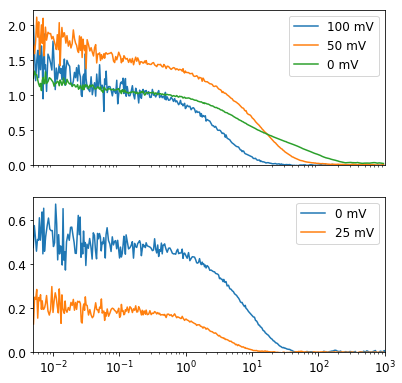

In [13]:
#fcs components
os.chdir('/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/1misc/fcs_component/');
f_100 = 'Point_A9_100mV(18)_60.5_1600s_26_FCS1.dat';
f_50 = 'Point_A8_050mV(15)_60.5_1980s_22_FCS1.dat';
f_0 = 'Point_A6_000mV(9)_60.5_1260s_10_FCS1.dat';
f_Zn_0 = 'Point_0.11uW_A3_ZnAzu_0mV(21)_200sec_27_FCS1.dat';
f_Zn_25 = 'Point_A5_ZnAzu_025mV(29)_60.5_260s_10_FCS1.dat';
#----
tmin = 0.005;tmax = 1000;
fig, axes = plt.subplots(2,1, figsize=(6.3, 6.3))
#---100 mV
df_fcs = pd.read_csv(f_100, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_100 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[0].plot(f_100[0],f_100[1], '-', label='100 mV')
#---50 mV
df_fcs = pd.read_csv(f_50, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_50 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[0].plot(f_50[0],f_50[1], '-', label='50 mV')
#---
df_fcs = pd.read_csv(f_0, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_0 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[0].plot(f_0[0],f_0[1], '-', label='0 mV')

axes[0].set_xscale('log')
axes[0].set_ylim(0, None)
axes[0].set_xlim(tmin, tmax)
axes[0].set_xticks([])
axes[0].legend()
#--ZnAzu 0 mV---
df_fcs = pd.read_csv(f_Zn_0, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_Zn_0 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[1].plot(f_Zn_0[0],f_Zn_0[1], '-', label='0 mV')
#ZnAzu 25 mV---
df_fcs = pd.read_csv(f_Zn_25, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_Zn_25 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[1].plot(f_Zn_25[0],f_Zn_25[1], '-', label='25 mV')

axes[1].set_xscale('log')
axes[1].set_ylim(0, None)
axes[1].set_xlim(tmin, tmax)
axes[1].legend()

os.chdir(download)
savefig('fcs_components.pdf', dpi=300, transparent=True)

## fcs comparision

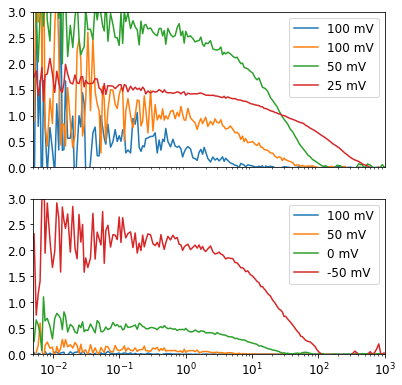

In [14]:
#fcs comparision
os.chdir('/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/1misc/fcs_comparision/');
# CuAzurin files
f_Cu_150 = 'CuAzu/Point_0.11uW_A3_150mV_6_FCS1.dat';
f_Cu_100 = 'CuAzu/Point_0.11uW_A3_100mV_6_FCS1.dat';
f_Cu_50 = 'CuAzu/Point_0.11uW_A3_50mV_6_FCS1.dat';
f_Cu_25 = 'CuAzu/Point_0.11uW_A3_25mV_300s_6_FCS1.dat';
#ZnAzurin files
f_Zn_100 = 'ZnAzu/Point_0.11uW_A4_100mV(33)_30sec_2_FCS1.dat';
f_Zn_50 = 'ZnAzu/Point_0.11uW_A4_50mV(32)_30sec_1_FCS1.dat';
f_Zn_0 = 'ZnAzu/Point_0.11uW_A4_0mV(31)_30sec_1_FCS1.dat';
f_Zn_n50 = 'ZnAzu/Point_0.11uW_A4_-50mV(30)_30sec_1_FCS1.dat';
#----
tmin = 0.005;tmax = 1000;
fig, axes = plt.subplots(2,1, figsize=(6.3, 6.3))
#--150 mV
df_fcs = pd.read_csv(f_Cu_150, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_150 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[0].plot(f_150[0],f_150[1], '-', label='100 mV')

#---100 mV
df_fcs = pd.read_csv(f_Cu_100, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_100 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[0].plot(f_100[0],f_100[1], '-', label='100 mV')
#---50 mV
df_fcs = pd.read_csv(f_Cu_50, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_50 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[0].plot(f_50[0],f_50[1], '-', label='50 mV')
#---25 mV
df_fcs = pd.read_csv(f_Cu_25, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_25 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[0].plot(f_25[0],f_25[1], '-', label='25 mV')

axes[0].set_xscale('log')
axes[0].set_ylim(0, 3)
axes[0].set_xlim(tmin, tmax)
axes[0].set_xticks([])
axes[0].legend()
#ZnAzu 100 mV---
df_fcs = pd.read_csv(f_Zn_100, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_Zn_100 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[1].plot(f_Zn_100[0],f_Zn_100[1], '-', label='100 mV')
#ZnAzu 50 mV---
df_fcs = pd.read_csv(f_Zn_50, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_Zn_50 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[1].plot(f_Zn_50[0],f_Zn_50[1], '-', label='50 mV')

#--ZnAzu 0 mV---
df_fcs = pd.read_csv(f_Zn_0, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_Zn_0 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[1].plot(f_Zn_0[0],f_Zn_0[1], '-', label='0 mV')
#--ZnAzu -50 mV---
df_fcs = pd.read_csv(f_Zn_n50, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
f_Zn_n50 = df_fcs[df_fcs[0]>=tmin]; df_fcs = df_fcs[df_fcs[0]<=tmax];
axes[1].plot(f_Zn_n50[0],f_Zn_n50[1], '-', label='-50 mV')

axes[1].set_xscale('log')
axes[1].set_ylim(0, 3)
axes[1].set_xlim(tmin, tmax)
axes[1].legend()

os.chdir(download)
savefig('fcs_comparision_smae_mol.pdf', dpi=300, transparent=True)

## Cyclic voltametry

### electrochemistry

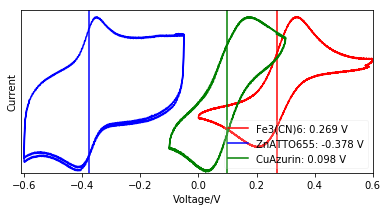

In [362]:
#Electerochemistry
os.chdir('/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/1misc/cyclic_voltametry')
f_FeCN = 'CV 1 mM K2FeCN6.xlsx';
f_ZnAT655 = 'CV 20 uM Dye-Zn azurin 2.xlsx';
f_CuAzu = 'CV 120 uM azurin in hepes ph 7 10 mV_s.xlsx';

V_corr = 0;
figure(figsize=(6.3, 3))###FIGSIZE#####
#Fe(CN)6
f = pd.read_excel(f_FeCN)
left_n = -9900;right_n=-7250
V = f['Potential applied (V)'][left_n:right_n]-V_corr;
I = f['WE(1).Current (A)'][left_n:right_n];
Id_max = I.idxmax(); Id_min = I.idxmin()
V_max = V[Id_max]; V_min = V[Id_min]
E0_FeCN = round((V_max+V_min)/2, 3);
plot(V, I/max(I), 'r', label='Fe3(CN)6: '+str(E0_FeCN)+' V')
plot(ones(100)*E0_FeCN, linspace(-1.4, 1.1, 100), 'r')
#ZnATTO655
f = pd.read_excel(f_ZnAT655)
left_n = 1000;right_n=-1
V = f['Potential applied (V)'][left_n:right_n]-V_corr;
I = f['WE(1).Current (A)'][left_n:right_n];
Id_max = I.idxmax(); Id_min = I.idxmin()
V_max = V[Id_max]; V_min = V[Id_min]
E0_ZnAT655 = round((V_max+V_min)/2, 3);
plot(V, I/max(I),'b', label='ZnATTO655: '+str(E0_ZnAT655)+' V')
plot(ones(100)*E0_ZnAT655, linspace(-1.4, 1.1, 100), 'b')
#CuAzurin
f = pd.read_excel(f_CuAzu)
left_n = 10000;right_n=-16000
V = f['Potential applied (V)'][left_n:right_n]-V_corr;
I = f['WE(1).Current (A)'][left_n:right_n];
Id_max = I.idxmax(); Id_min = I.idxmin()
V_max = V[Id_max]; V_min = V[Id_min]
E0_CuAzu = round((V_max+V_min)/2, 3);
plot(V, I/max(I),'g', label='CuAzurin: '+str(E0_CuAzu)+' V')
plot(ones(100)*E0_CuAzu, linspace(-1.4, 1.1, 100), 'g')

ylabel('Current')
xlabel('Voltage/V')
ylim(-1.2, 1.1)
xlim(-0.61, 0.6)
yticks([])
legend(loc=4, framealpha=0.2)
os.chdir(download)
savefig('cyclic_voltametry.pdf', dpi=300, transparent=True)

### fluoremetry

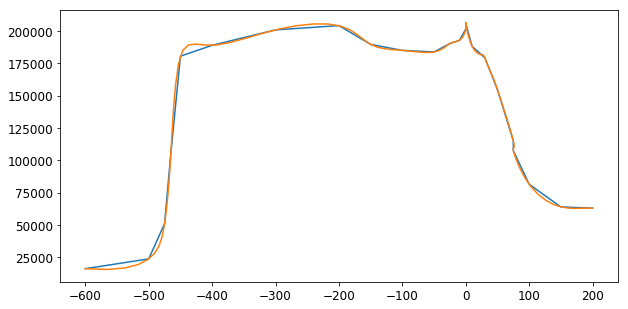

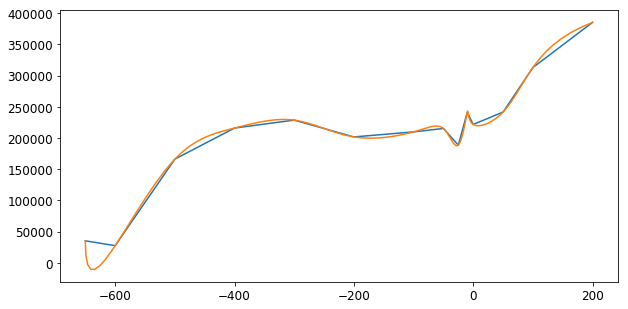

In [164]:
#fluoroelectrochemistry
os.chdir('/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/1misc/fluorescence_vltametry');
f_Cu = 'CuAzuAT655_62.5.xlsx';
f_Zn = '20161016_ZnAzu655_bulk.xlsx'
import scipy.interpolate
def interpol(x=x, y=y, plotting=True, figsize=(10, 5)):
    t = np.arange(x.shape[0], dtype=float)
    t /= t[-1]
    nt = np.linspace(0, 1, 100)
    x1 = scipy.interpolate.spline(t, x, nt)
    y1 = scipy.interpolate.spline(t, y, nt)
    if plotting ==  True:
        figure(figsize=figsize)
        plt.plot(x,y, label='poly')
        plot(x1, y1, label='range_spline')
    V_int = x1; counts_int=y1
    return(V_int, counts_int)
f_Cu = pd.read_excel(f_Cu,sheetname=0 ,header=1)
f_Cu = f_Cu.sort(['Potential'], ascending=[1]); f_Cu.reset_index(drop=True, inplace=True)
V = f_Cu['Potential']; counts = f_Cu['counts'];
V_Cu_n, counts_Cu_n = interpol(x=V[:-2], y=counts[:-2], plotting=True)
#ZnAzu
f_Zn = pd.read_excel(f_Zn,sheetname=0 ,header=1)
f_Zn = f_Zn.sort(['Potential'], ascending=[1]); f_Zn.reset_index(drop=True, inplace=True)
V_Zn = f_Zn['Potential']; counts_Zn = f_Zn['Counts'];
V_Zn_n, counts_Zn_n = interpol(x=V_Zn[:], y=counts_Zn[:], plotting=True)

# fig, axes = plt.subplots(1,2, figsize=(16,5))
# axes[0].plot(V, counts,
#              V_Cu_n, counts_Cu_n,
#              V_Zn, counts_Zn,
#              V_Zn_n, counts_Zn_n)
# axes[0].set_xlim(-50, 200)
# axes[1].plot(V_Cu_n, counts_Cu_n-counts_Zn_n)

## [Substrate]
Units of potentials are in [mV]

$E=E_0 + 59\log{\frac{[oxd]}{[red]}}$

$[oxd] + [red] = m = 200*10^{-6}$ 

$\frac{[oxd]}{[red]} = 10^{\frac{E-E_0}{59}}$

E0_Ascorbate: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2921859/, https://employees.csbsju.edu/hjakubowski/classes/ch331/oxphos/standredpotentialtab.htm

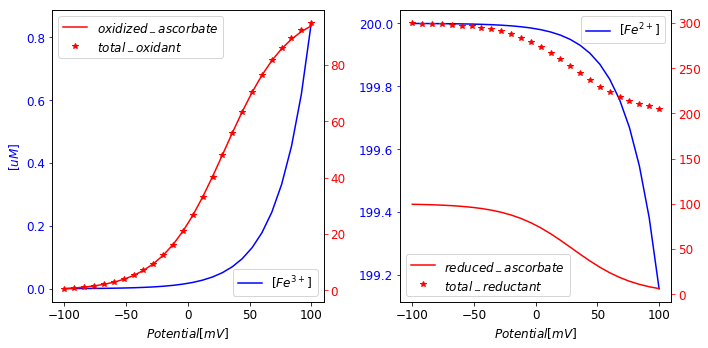

In [299]:
def substrate_conc(E0, E, M, n=1):
    '''All potential values are in mV'''
    #E = E + 240; E0=E0+240;
    Ecorr = 10**((E-E0)*n/59) # DUBIOUS formula
    S_oxd = (M*Ecorr)/(1+Ecorr)
    S_red = M/(1+Ecorr)
    return E, S_oxd, S_red #E-240
E=linspace(-100, 100, 26)
M_FeCN = 200;
E, FeCN_oxd, FeCN_red = substrate_conc(E0=240, E=E, M=M_FeCN)
M_asc = 100;
E, asc_oxd, asc_red = substrate_conc(E0=30, E=E, M=M_asc, n=1)
#----------------wrapping vlaues to dataframe------------
def wrap_values():
    df = pd.DataFrame()
    df['E'] = E;
    df['FeCN_oxd'] = FeCN_oxd;
    df['asc_oxd'] = asc_oxd;
    df['FeCN_oxd+asc_oxd'] = FeCN_oxd + asc_oxd;
    df['FeCN_red'] = FeCN_red;
    df['asc_red'] = asc_red;
    df['FeCN_red+asc_red'] = FeCN_red+asc_red;
    return(df)
df=wrap_values()
#--------------Plotting simulated values---------------
def plot_substrate_conc():
    fig, axes = plt.subplots(1,2, figsize=(10, 5))
    # FeCN oxd
    ax1 = axes[0]
    ax1.plot(E, FeCN_oxd, 'b', label='$[Fe^{3+}]$')
    ax1.set_ylabel('$[uM]$', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_xlabel('$Potential[mV]$')

    ax1_r = ax1.twinx()
    ax1_r.plot(E, asc_oxd, 'r', label='$oxidized_- ascorbate$')
    ax1_r.tick_params('y', colors='r')

    ax1_r.plot(E, FeCN_oxd+asc_oxd, '*r', label='$total_- oxidant$')
    # reductant
    ax2 = axes[1];
    ax2.plot(E, FeCN_red, 'b', label='$[Fe^{2+}]$')
    ax2.tick_params('y', colors='b')
    ax2.set_xlabel('$Potential[mV]$')

    ax2_r = ax2.twinx()
    ax2_r.plot(E, asc_red, 'r', label='$reduced_- ascorbate$')
    ax2_r.tick_params('y', colors='r')
    ax2_r.plot(E, FeCN_red+asc_red, '*r', label='$total_- reductant$')

    ax1.legend(loc=4); ax1_r.legend(loc=2);ax2.legend(loc=1); ax2_r.legend(loc=3)
    fig.tight_layout()
    plt.show()
    return(fig)
fig=plot_substrate_conc()
os.chdir(download)
savefig('substrate_conc', dpi=300, transparent=True)

## BulkSwitch_SpectralOverlap

In [348]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "10"

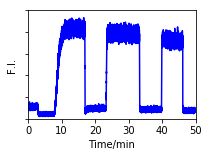

In [349]:
#Fluorescence switching
os.chdir('/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/1misc/bulk_switching')
f_Cu655  = 'Switching Experiments Cu-azrin Peak3 17JAN2014.csv';
f_Cu655 = pd.read_csv(f_Cu655, header=1)
fig, ax = plt.subplots(figsize=(3, 2));
ax.plot(f_Cu655['Time (min)'], f_Cu655['Intensity (a.u.)'], 'b')
ax.set_xlim(0, 50)
ax.set_ylim(0, 250)
ax.set_ylabel('F.I.')
ax.set_xlabel('Time/min')
ax.yaxis.set_ticklabels([])
os.chdir(download)
savefig('fluorescence_bulk_switching.pdf', dpi=300, transparent=True)

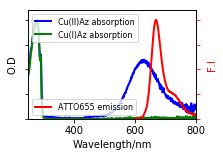

In [350]:
#Spectra overlap
os.chdir('/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/1misc/spectra_overlap')
f = 'uv_vis_spectraldata.dat';
d = pd.read_csv(f, header=0, sep='\t');
fig, ax = plt.subplots(figsize=(3, 2));
lw=2;
ax.plot(d['wavelength'], d['Cu(II)Az'], 'b', lw=lw, label = 'Cu(II)Az absorption');

ax.plot(d['wavelength.2'], d['Cu(I)Az'],'g', lw=lw, label = 'Cu(I)Az absorption')
ax_r = ax.twinx()
wavelength_A655=pd.to_numeric(d['wavelength.1'], errors='coerce').dropna();
FI_A655 = pd.to_numeric(d['ATTO 655 em'], errors='coerce').dropna()
ax_r.plot(wavelength_A655, FI_A655, 'r', lw=lw, label = 'ATTO655 emission');
ax_r.tick_params('y', colors='r')
ax.set_xlim(250, 800)
ax.set_ylim(0, 1.1)
ax.yaxis.set_ticklabels([])
ax.set_xlabel('Wavelength/nm')
ax.legend(loc=2, fontsize=8)

ax_r.set_ylim(0, 1.1)
ax_r.set_ylabel('F.I', color='r')
ax.set_ylabel('O.D')
ax_r.legend(loc=3, fontsize=8)
ax_r.yaxis.set_ticklabels([])
os.chdir(download)
savefig('Spectral_overlap.pdf', dpi=300, transparent=True)

In [ ]:
tau_on_i = t_ons;
t_ij = []
for i in range(len(tau_on_i)-1):
    t_i = tau_on_i[i];
    t_j = tau_on_i[i+1:];
    t_ij_temp = t_i * t_j
    t_ij = concatenate((t_ij, t_ij_temp), axis=0)
#     t_ij.append(t_ij_temp)
# t_ij

In [85]:
tau_on_i = t_ons[len(t_ons)/2:];
os.chdir('/home/biswajit/Downloads/temp')
t_ij = [];
length=[];
for i in range(200):#len(tau_on_i)-1
    t_i = tau_on_i[i];
    t_j = tau_on_i[i+1:];
    t_ij_temp = t_i * t_j
    t_ij = np.append(t_ij,t_ij_temp)
    length_temp = len(t_ij)
    length.append(length_temp)
#     if len(t_ij)>1e6:
#         np.save('t_ij'+str(i), t_ij)
#         t_ij = []
# np.save('t_ij'+str(i), t_ij)
# print(length)